## 예제
1. test_csv 폴더에 있는 '유통+업종(백화점,+할인점,+슈퍼마켓,+편의점)+카드소비트렌드+데이터_1901_2109' 파일을 로드
2. 각 컬럼의 이름을 ['기준연월', '업종', '성별', '연령대', '총이용건수', '총이용금액']
3. 기준년월을 시계열데이터로 변경
4. 성별 컬럼의 데이터를 1은 남자, 2는 여자로 변경, 9는 무관
5. 남,녀 성별을 기준으로 연도별 건당 이용금액의 평균이 몇인지 출력

In [243]:
import pandas as pd

In [244]:
df = pd.read_csv("../test_csv/유통+업종(백화점,+할인점,+슈퍼마켓,+편의점)+카드소비트렌드+데이터_1901_2109.csv", encoding='euc-kr')
# encoding='euc-kr' 는 한국어로 되어있는 데이터 읽기

In [ ]:
df.head()

In [245]:
df.columns = ['기준연월', '업종', '성별', '연령대', '총이용건수', '총이용금액']

In [246]:
df.head()

,기준연월,업종,성별,연령대,총이용건수,총이용금액
0,201901,백화점,1,1,1,7600.000000
1,201901,백화점,1,10,379,19458720.000000
2,201901,백화점,1,20,45173,4747711001.000000
3,201901,백화점,1,30,271858,27918261543.000000
4,201901,백화점,1,40,391109,37911486656.000000


In [247]:
# 판다스에서 지수표현 없애기
pd.options.display.float_format = '{:2f}'.format

In [248]:
df.head()

,기준연월,업종,성별,연령대,총이용건수,총이용금액
0,201901,백화점,1,1,1,7600.000000
1,201901,백화점,1,10,379,19458720.000000
2,201901,백화점,1,20,45173,4747711001.000000
3,201901,백화점,1,30,271858,27918261543.000000
4,201901,백화점,1,40,391109,37911486656.000000


In [249]:
# 기준년월 데이터를 시계열 변경
df['기준연월'] = pd.to_datetime(df['기준연월'], format='%Y%m')

pd.to_datetime(df['기준연월'], format='%Y%m')

0      2019-01-01
1      2019-01-01
2      2019-01-01
3      2019-01-01
4      2019-01-01
          ...    
2643   2021-09-01
2644   2021-09-01
2645   2021-09-01
2646   2021-09-01
2647   2021-09-01
Name: 기준연월, Length: 2648, dtype: datetime64[ns]

In [250]:
df

,기준연월,업종,성별,연령대,총이용건수,총이용금액
0,2019-01-01,백화점,1,1,1,7600.000000
1,2019-01-01,백화점,1,10,379,19458720.000000
2,2019-01-01,백화점,1,20,45173,4747711001.000000
3,2019-01-01,백화점,1,30,271858,27918261543.000000
4,2019-01-01,백화점,1,40,391109,37911486656.000000
...,...,...,...,...,...,...
2643,2021-09-01,편의점,2,50,844081,6283353303.000000
2644,2021-09-01,편의점,2,60,243768,1997441975.000000
2645,2021-09-01,편의점,2,70,40523,352420260.000000
2646,2021-09-01,편의점,2,80,6349,53334882.000000


In [251]:
df.head()

,기준연월,업종,성별,연령대,총이용건수,총이용금액
0,2019-01-01,백화점,1,1,1,7600.000000
1,2019-01-01,백화점,1,10,379,19458720.000000
2,2019-01-01,백화점,1,20,45173,4747711001.000000
3,2019-01-01,백화점,1,30,271858,27918261543.000000
4,2019-01-01,백화점,1,40,391109,37911486656.000000


In [252]:
# 인덱스를 기준년월로 설정
df.set_index('기준연월', inplace = True)

In [253]:
# 괴상한 데이터
df['연령대'].value_counts()

연령대
10    264
20    264
30    264
40    264
50    264
60    264
70    264
80    264
90    264
0     233
1      39
Name: count, dtype: int64

In [254]:
# 성별 컬럼에서 1은 남자 2는 여자 9는 무관

#case 1

def change(x):
    if x == 1 :
        result = '남자'
    elif x == 2 :
        result = '여자'
    elif x == 9 : 
        result == '무관'
    else:
        result = "-"
    return result

df['성별'].apply(change).value_counts()

성별
여자    1336
남자    1312
Name: count, dtype: int64

In [255]:
# case 2
df['성별'].apply(lambda x : "남자" if (x == 1)
    else("여자" if (x == 2)
    else("무관"))
)

기준연월
2019-01-01    남자
2019-01-01    남자
2019-01-01    남자
2019-01-01    남자
2019-01-01    남자
              ..
2021-09-01    여자
2021-09-01    여자
2021-09-01    여자
2021-09-01    여자
2021-09-01    여자
Name: 성별, Length: 2648, dtype: object

In [256]:
# case 3
df['성별'] = df['성별'].replace({1: '남자', 2: '여자', 9: '무관'})

In [257]:
df['성별'].value_counts()

성별
여자    1336
남자    1312
Name: count, dtype: int64

In [258]:
df

,업종,성별,연령대,총이용건수,총이용금액
기준연월,,,,,
2019-01-01,백화점,남자,1,1,7600.000000
2019-01-01,백화점,남자,10,379,19458720.000000
2019-01-01,백화점,남자,20,45173,4747711001.000000
2019-01-01,백화점,남자,30,271858,27918261543.000000
2019-01-01,백화점,남자,40,391109,37911486656.000000
...,...,...,...,...,...
2021-09-01,편의점,여자,50,844081,6283353303.000000
2021-09-01,편의점,여자,60,243768,1997441975.000000
2021-09-01,편의점,여자,70,40523,352420260.000000


In [259]:
# 연도 파생변수 생성
# 위에 기준연월로 되어있으므로 
df['연도'] = df.index.strftime("%Y")

In [260]:
df.head()

,업종,성별,연령대,총이용건수,총이용금액,연도
기준연월,,,,,,
2019-01-01,백화점,남자,1,1,7600.000000,2019
2019-01-01,백화점,남자,10,379,19458720.000000,2019
2019-01-01,백화점,남자,20,45173,4747711001.000000,2019
2019-01-01,백화점,남자,30,271858,27918261543.000000,2019
2019-01-01,백화점,남자,40,391109,37911486656.000000,2019


In [261]:
# 건당 이용금액 파생변수 생성
# 총이용금액 / 총이용건수
df['건당이용금액'] = df['총이용금액'] / df['총이용건수']

In [262]:
df.head()

,업종,성별,연령대,총이용건수,총이용금액,연도,건당이용금액
기준연월,,,,,,,
2019-01-01,백화점,남자,1,1,7600.000000,2019,7600.000000
2019-01-01,백화점,남자,10,379,19458720.000000,2019,51342.269129
2019-01-01,백화점,남자,20,45173,4747711001.000000,2019,105100.635357
2019-01-01,백화점,남자,30,271858,27918261543.000000,2019,102694.279892
2019-01-01,백화점,남자,40,391109,37911486656.000000,2019,96933.301601


<Axes: xlabel='연도,성별'>

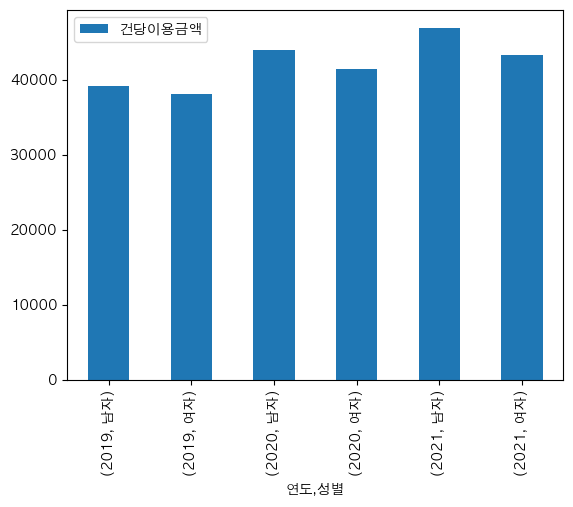

In [263]:
df[['연도', '성별', '건당이용금액']].groupby(['연도', '성별']).mean().plot.bar()

In [264]:
import platform

In [265]:
import matplotlib.pyplot as plt

In [266]:
# 그래프에서 한글 깨짐 방지
if platform.system() == "Darwin": # 맥인경우
    plt.rc('font', family = 'AppleGothic')
else:
    plt.rc('font', family = 'Malgun Gothic')

In [ ]:
(df[['연도', "성별" ,'건당이용금액']].groupby(['연도', '성별']).mean()).plot.bar()

In [267]:
pivot = pd.pivot_table(
    df,
    index = '연도',
    columns = '성별',
    aggfunc = 'mean',
    values = '건당이용금액'
)

<Axes: xlabel='연도'>

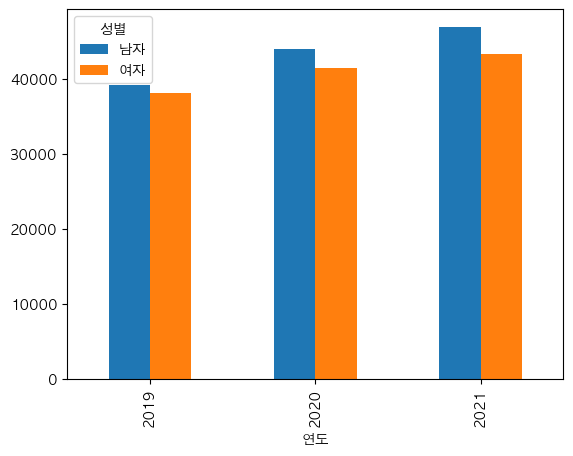

In [268]:
pivot.plot.bar()

### 온라인 카드 매출과 오프라인 카드 매출을 월별로 비교
1. 오프라인 데이터 df를 월별로 그룹화 총 이용금액의 합계
    - 인덱스는 기준년월을 시계열로 변경한 데이터로 설정
2. 온라인 데이터 df_online도 월별로 그룹화 총이용금액의 합계
    - 인덱스는 기준년월을 시계열로 변경한 데이터로 설정

In [269]:
df.head()

,업종,성별,연령대,총이용건수,총이용금액,연도,건당이용금액
기준연월,,,,,,,
2019-01-01,백화점,남자,1,1,7600.000000,2019,7600.000000
2019-01-01,백화점,남자,10,379,19458720.000000,2019,51342.269129
2019-01-01,백화점,남자,20,45173,4747711001.000000,2019,105100.635357
2019-01-01,백화점,남자,30,271858,27918261543.000000,2019,102694.279892
2019-01-01,백화점,남자,40,391109,37911486656.000000,2019,96933.301601


In [270]:
group_data = df.groupby(df.index).sum()['총이용금액']

In [271]:
df_online = pd.read_csv("../test_csv/온라인+카드소비트렌드+데이터_1901_2109.csv")
df_online.head()

,crym,ma_fem_dc,agegrp_dc,tco_btc_u_ct,tco_btc_u_am
0,201901,1,1,1,110685
1,201901,1,10,2333,98108225
2,201901,1,20,272915,13854081656
3,201901,1,30,1320227,82946127640
4,201901,1,40,1372052,95550848337


In [272]:
# 컬럼의 이름을 변경
df_online.columns = ['기준연월', '성별', '연령대', '총이용건수', '총이용금액']
df_online.head()

,기준연월,성별,연령대,총이용건수,총이용금액
0,201901,1,1,1,110685
1,201901,1,10,2333,98108225
2,201901,1,20,272915,13854081656
3,201901,1,30,1320227,82946127640
4,201901,1,40,1372052,95550848337


In [273]:
# 기준년월을 시계별로 변경하고 인덱스로 설정
df_online['기준연월'] = pd.to_datetime(df_online['기준연월'], format = '%Y%m')

In [274]:
df_online.set_index('기준연월', inplace = True)

In [275]:
# 그룹화
group_data2 =  df_online.groupby('기준연월').sum()['총이용금액']

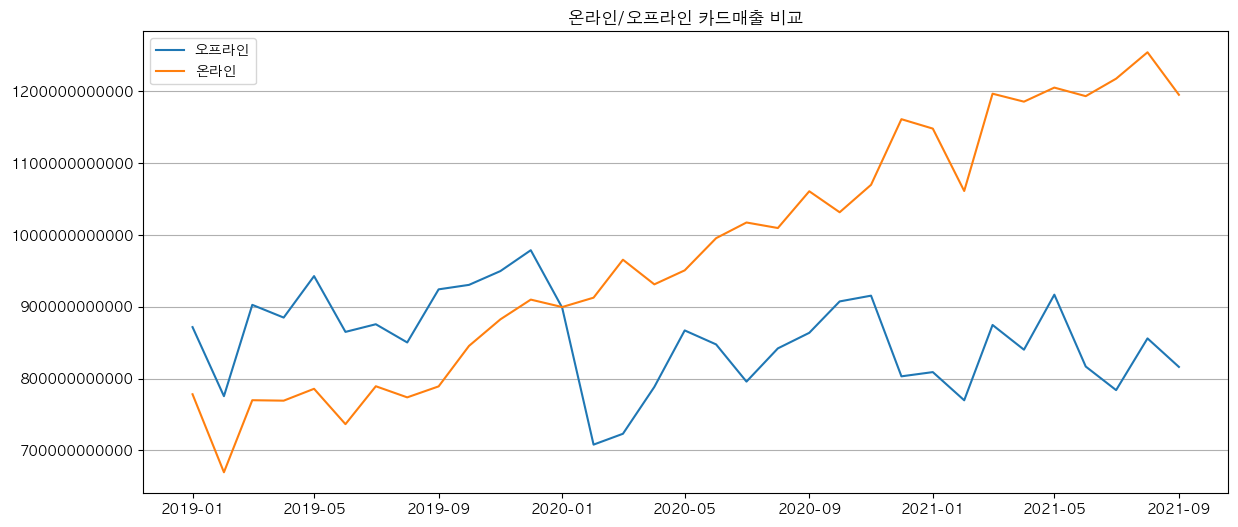

In [276]:
# 그래프로 시각화

# 그래프의 사이즈 변경
plt.figure(figsize = (14, 6))

# grid 추가
plt.grid(True, axis = 'y')

# 지수표현 제거
plt.ticklabel_format(axis = 'y', style = 'plain')

plt.plot(group_data, label = '오프라인')
plt.plot(group_data2, label = '온라인')
plt.title("온라인/오프라인 카드매출 비교")
plt.legend()
plt.show()

In [277]:
# 파이썬에서 data_group2에 '업종'을 추가 시키기
# '업종'에 온라인을 넣기

In [278]:
df_online['업종'] = "온라인"

In [279]:
df_online

,성별,연령대,총이용건수,총이용금액,업종
기준연월,,,,,
2019-01-01,1,1,1,110685,온라인
2019-01-01,1,10,2333,98108225,온라인
2019-01-01,1,20,272915,13854081656,온라인
2019-01-01,1,30,1320227,82946127640,온라인
2019-01-01,1,40,1372052,95550848337,온라인
...,...,...,...,...,...
2021-09-01,2,50,3237324,181360535814,온라인
2021-09-01,2,60,1019719,70026626874,온라인
2021-09-01,2,70,159261,13091029631,온라인


In [281]:
df_online.columns = ['업종', '성별', '연령대', '총이용건수', '총이용금액']
df_online

,업종,성별,연령대,총이용건수,총이용금액
기준연월,,,,,
2019-01-01,1,1,1,110685,온라인
2019-01-01,1,10,2333,98108225,온라인
2019-01-01,1,20,272915,13854081656,온라인
2019-01-01,1,30,1320227,82946127640,온라인
2019-01-01,1,40,1372052,95550848337,온라인
...,...,...,...,...,...
2021-09-01,2,50,3237324,181360535814,온라인
2021-09-01,2,60,1019719,70026626874,온라인
2021-09-01,2,70,159261,13091029631,온라인


In [284]:
total_df = pd.concat([df, df_online], axis = 'rows')

In [285]:
total_df['업종'].value_counts()

업종
편의점     667
백화점     664
슈퍼마켓    663
할인점     654
1       326
2       325
Name: count, dtype: int64